___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
#data
import numpy as np
import pandas as pd
#tensorflow/keras
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
#optimization
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna
#model saving
import pickle
from tensorflow.keras.models import load_model

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
#valdation split
X_train_v, X_val, y_train_v, y_val = train_test_split(x_train, y_train, test_size = 0.1, stratify = y_train)

In [4]:
X_train_v.max()

255

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
X_train_v.shape

(54000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
X_val.shape

(6000, 28, 28)

In [10]:
y_val.shape

(6000,)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [11]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

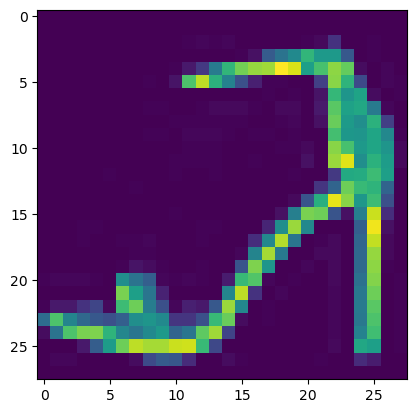

In [13]:
plt.imshow(X_train_v[20])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [15]:
x_train.max()

255

In [16]:
X_train_v.max()

255

In [17]:
X_val.max()

255

In [18]:
x_test.max()

255

In [19]:
X_train = x_train.astype("float32")
X_test = x_test.astype("float32")
X_train /= 255
X_test /= 255

In [20]:
X_train_v = X_train_v.astype("float32")
X_val = X_val.astype("float32")
X_train_v /= 255
X_val /= 255

In [21]:
X_train_v.max()

1.0

In [22]:
X_train.max()

1.0

In [23]:
X_val.max()

1.0

In [24]:
X_test.max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [25]:
X_train_vs = np.expand_dims(X_train_v, -1)
X_val_s = np.expand_dims(X_val, -1)

In [26]:
X_train_s = np.expand_dims(X_train, -1)
X_test_s = np.expand_dims(X_test, -1)

In [27]:
X_train_s.shape

(60000, 28, 28, 1)

In [28]:
X_val_s.shape

(6000, 28, 28, 1)

In [29]:
X_train_vs.shape

(54000, 28, 28, 1)

In [30]:
X_test_s.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [31]:
y_train_vc = to_categorical(y_train_v)
y_val_vc = to_categorical(y_val)

In [32]:
y_train_c = to_categorical(y_train)
y_test_c = to_categorical(y_test)

In [33]:
y_train_vc.max()

1.0

In [34]:
y_val_vc.max()

1.0

In [35]:
y_train_c.max()

1.0

In [36]:
y_test_c.max()

1.0

# Modeling

## Create the model 

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [37]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu",padding="same"))
model.add(MaxPool2D(pool_size=(2, 2), strides = (1, 1)))


model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 23328)             0         
                                                                 
 dense (Dense)               (None, 128)               2986112   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,987,722
Trainable params: 2,987,722
Non-trainable params: 0
______________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [39]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5,
                                           restore_best_weights=True)

In [40]:
model_history = model.fit(X_train_vs, y_train_vc, batch_size=32, epochs=30, callbacks=[early_stop], validation_data = (X_val_s, y_val_vc))

Epoch 1/30


2023-11-02 01:41:48.488330: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  91/1688 [>.............................] - ETA: 21s - loss: 0.9303 - accuracy: 0.6848

1688/1688 [==============================] - 20s 12ms/step - loss: 0.3927 - accuracy: 0.8608 - val_loss: 0.3323 - val_accuracy: 0.8822
Epoch 2/30
1688/1688 [==============================] - 19s 11ms/step - loss: 0.2574 - accuracy: 0.9066 - val_loss: 0.2837 - val_accuracy: 0.9045
Epoch 3/30
1688/1688 [==============================] - 19s 11ms/step - loss: 0.2106 - accuracy: 0.9221 - val_loss: 0.2554 - val_accuracy: 0.9118
Epoch 4/30
1688/1688 [==============================] - 19s 12ms/step - loss: 0.1782 - accuracy: 0.9351 - val_loss: 0.2391 - val_accuracy: 0.9203
Epoch 5/30
1688/1688 [==============================] - 20s 12ms/step - loss: 0.1529 - accuracy: 0.9439 - val_loss: 0.2504 - val_accuracy: 0.9167
Epoch 6/30
1688/1688 [==============================] - 20s 12ms/step - loss: 0.1324 - accuracy: 0.9522 - val_loss: 0.2640 - val_accuracy: 0.9228
Epoch 7/30
1688/1688 [==============================] - 20s 12ms/step - loss: 0.1128 - accuracy: 0.9600 - val_loss: 0.2774 - val_accura

In [41]:
summary_model = pd.DataFrame(model.history.history)
summary_model= summary_model.mean().values

summary_model= pd.DataFrame(summary_model)
summary_model= summary_model.rename(index={0: 'loss', 1: 'accuracy', 2: 'val_loss', 3:'val_accuracy'})
summary_model


,0
loss,0.179931
accuracy,0.935056
val_loss,0.281902
val_accuracy,0.912852


In [42]:
loss, accuracy  = model.evaluate(X_test_s, y_test_c, verbose=0)
loss_model= print("loss: ", loss)
accuracy_model= print('accuracy',accuracy) 


loss:  0.26836925745010376
accuracy 0.911300003528595


**TASK 7: Plot values of metrics you used in your model.**

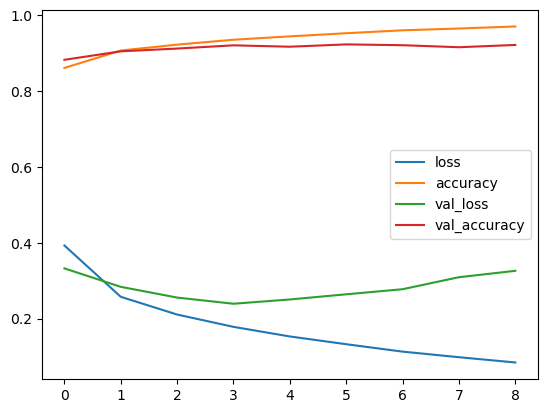

In [43]:
loss_df_model = pd.DataFrame(model_history.history)
loss_df_model.plot();

## Model L1:

In [44]:
model_l1 = Sequential(
    [
        Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu", padding="same"), 

        MaxPool2D(pool_size=(2, 2), strides = (1, 1)),

        Flatten(),
       

        Dense(128,activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)),
        Dense(10,activation='softmax')

        

        
       
    ]
)
model_l1.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)

In [45]:
model_l1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 20412)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2612864   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,614,434
Trainable params: 2,614,434
Non-trainable params: 0
____________________________________________

##  Model L1 Training 

In [46]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5,
                                           restore_best_weights=True)

In [47]:
model_l1_history = model_l1.fit(X_train_vs, y_train_vc, batch_size=32, epochs=30, callbacks=[early_stop], validation_data = (X_val_s, y_val_vc))#32 or less batch size

Epoch 1/30


1688/1688 [==============================] - 21s 12ms/step - loss: 12.9729 - accuracy: 0.2204 - val_loss: 12.4698 - val_accuracy: 0.2688
Epoch 2/30
1688/1688 [==============================] - 21s 13ms/step - loss: 12.5363 - accuracy: 0.2726 - val_loss: 12.4931 - val_accuracy: 0.2222
Epoch 3/30
1688/1688 [==============================] - 21s 13ms/step - loss: 12.5294 - accuracy: 0.3112 - val_loss: 12.4514 - val_accuracy: 0.3478
Epoch 4/30
1688/1688 [==============================] - 21s 12ms/step - loss: 12.5112 - accuracy: 0.3984 - val_loss: 12.4721 - val_accuracy: 0.2830
Epoch 5/30
1688/1688 [==============================] - 21s 13ms/step - loss: 12.5038 - accuracy: 0.4214 - val_loss: 12.4370 - val_accuracy: 0.4317
Epoch 6/30
1688/1688 [==============================] - 21s 13ms/step - loss: 12.5002 - accuracy: 0.4437 - val_loss: 12.4470 - val_accuracy: 0.4538
Epoch 7/30
1688/1688 [==============================] - 21s 13ms/step - loss: 12.4978 - accuracy: 0.4529 - val_loss: 12.420

In [48]:
summary_model_l1 = pd.DataFrame(model_l1.history.history)
summary_model_l1= summary_model_l1.mean().values

summary_model_l1= pd.DataFrame(summary_model_l1)
summary_model_l1= summary_model_l1.rename(index={0: 'loss', 1: 'accuracy', 2: 'val_loss', 3:'val_accuracy'})
summary_model_l1

,0
loss,12.543772
accuracy,0.406258
val_loss,12.452332
val_accuracy,0.394667


In [49]:
loss, accuracy  = model_l1.evaluate(X_test_s, y_test_c, verbose=0)
loss_l1= print("loss: ", loss)
accuracy_l1= print('accuracy',accuracy) 


loss:  12.420792579650879
accuracy 0.558899998664856


**TASK 7: Plot values of metrics you used in your model.**

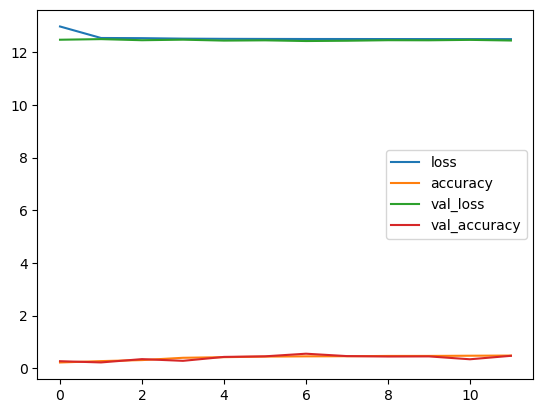

In [50]:
loss_df_model_l1 = pd.DataFrame(model_l1_history.history)
loss_df_model_l1.plot();

## Model L2

In [51]:
model_l2= Sequential(
    [
        Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu", padding="same"), 

        MaxPool2D(pool_size=(2, 2), strides = (1, 1)),

        Flatten(),
        

        Dense(128,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        
        Dense(10,activation='softmax')       
    ]
)
model_l2.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)

In [52]:
model_l2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 20412)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               2612864   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,614,434
Trainable params: 2,614,434
Non-trainable params: 0
____________________________________________

##  Model L2 Training 

In [53]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5,
                                           restore_best_weights=True)

In [54]:
model_l2_history = model_l2.fit(X_train_vs, y_train_vc, batch_size=32, epochs=30, callbacks=[early_stop], validation_data = (X_val_s, y_val_vc))

Epoch 1/30


1688/1688 [==============================] - 21s 12ms/step - loss: 0.1302 - accuracy: 0.8101 - val_loss: 0.1000 - val_accuracy: 0.8462
Epoch 2/30
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0967 - accuracy: 0.8469 - val_loss: 0.1065 - val_accuracy: 0.8217
Epoch 3/30
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0909 - accuracy: 0.8579 - val_loss: 0.0853 - val_accuracy: 0.8692
Epoch 4/30
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0864 - accuracy: 0.8663 - val_loss: 0.0903 - val_accuracy: 0.8542
Epoch 5/30
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0841 - accuracy: 0.8698 - val_loss: 0.1036 - val_accuracy: 0.8217
Epoch 6/30
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0828 - accuracy: 0.8728 - val_loss: 0.0848 - val_accuracy: 0.8627
Epoch 7/30
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0809 - accuracy: 0.8766 - val_loss: 0.0862 - val_accura

In [55]:
summary_model_l2 = pd.DataFrame(model_l2.history.history)
summary_model_l2= summary_model_l2.mean().values

summary_model_l2= pd.DataFrame(summary_model_l2)
summary_model_l2= summary_model_l2.rename(index={0: 'loss', 1: 'accuracy', 2: 'val_loss', 3:'val_accuracy'})
summary_model_l2

,0
loss,0.083926
accuracy,0.871919
val_loss,0.084994
val_accuracy,0.866765


In [56]:
loss, accuracy = model_l2.evaluate(X_test_s, y_test_c, verbose=0)
loss_l2= print("loss: ", loss)
accuracy_l2= print('accuracy',accuracy) 


loss:  0.0793294683098793
accuracy 0.8779000043869019


**TASK 7: Plot values of metrics you used in your model.**

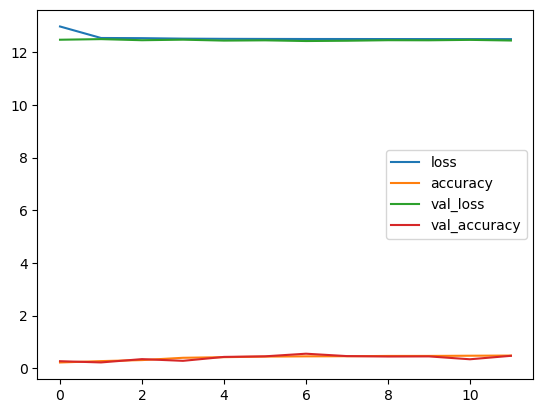

In [57]:
loss_df_model_l2 = pd.DataFrame(model_l1_history.history)
loss_df_model_l2.plot();

## Model droupout

In [58]:
model_dropout = Sequential(
    [
        Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu", padding="same"), 
        MaxPool2D(pool_size=(2, 2), strides = (1, 1)),

        Flatten(),
        Dropout(0.5),

        Dense(128,activation='relu'),
        Dense(10,activation='softmax')
       
    ]
)
model_dropout.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)

In [59]:
model_dropout.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 20412)             0         
                                                                 
 dropout (Dropout)           (None, 20412)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               2612864   
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                      

##  Model dropout Training 

In [60]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5,
                                           restore_best_weights=True)

In [61]:
model_dropout_history = model_dropout.fit(X_train_vs, y_train_vc, batch_size=32, epochs=30, callbacks=[early_stop], validation_data = (X_val_s, y_val_vc))

Epoch 1/30


1688/1688 [==============================] - 24s 14ms/step - loss: 0.0781 - accuracy: 0.8463 - val_loss: 0.0611 - val_accuracy: 0.8777
Epoch 2/30
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0548 - accuracy: 0.8922 - val_loss: 0.0528 - val_accuracy: 0.8947
Epoch 3/30
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0483 - accuracy: 0.9052 - val_loss: 0.0484 - val_accuracy: 0.9052
Epoch 4/30
1688/1688 [==============================] - 23s 14ms/step - loss: 0.0442 - accuracy: 0.9134 - val_loss: 0.0450 - val_accuracy: 0.9145
Epoch 5/30
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0414 - accuracy: 0.9196 - val_loss: 0.0437 - val_accuracy: 0.9163
Epoch 6/30
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0389 - accuracy: 0.9240 - val_loss: 0.0451 - val_accuracy: 0.9125
Epoch 7/30
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0373 - accuracy: 0.9280 - val_loss: 0.0467 - val_accura

In [62]:
summary_model_dropout = pd.DataFrame(model_dropout.history.history)
summary_model_dropout= summary_model_dropout.mean().values

summary_model_dropout= pd.DataFrame(summary_model_dropout)
summary_model_dropout= summary_model_dropout.rename(index={0: 'loss', 1: 'accuracy', 2: 'val_loss', 3:'val_accuracy'})
summary_model_dropout

,0
loss,0.039500
accuracy,0.924805
val_loss,0.046863
val_accuracy,0.912811


In [63]:
loss, accuracy = model_dropout.evaluate(X_test_s, y_test_c, verbose=0)
loss_drout= print("loss: ", loss)
accuracy_dropout= print('accuracy',accuracy) 


loss:  0.04611595347523689
accuracy 0.9172999858856201


**.TASK 7: Plot values of metrics you used in your model.**

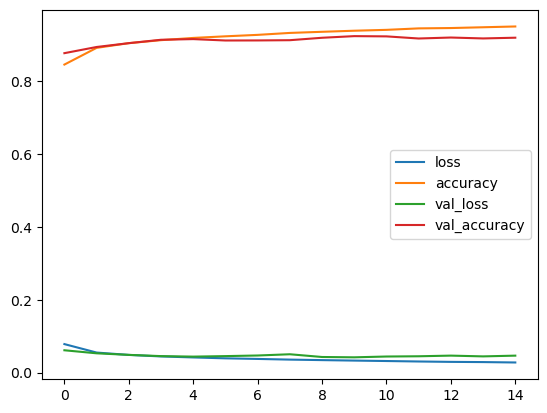

In [64]:
loss_df_model_dropout = pd.DataFrame(model_dropout_history.history)
loss_df_model_dropout.plot();

## Model layer

In [65]:
model_layer = Sequential(
    [
        Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu", padding="same"), 

        MaxPool2D(pool_size=(2, 2), strides = (1, 1)),

        Flatten(),

        Dense(128,activation='relu'),

        Dense(64,activation='relu'),
        
        Dense(10,activation='softmax')

    ]
)
model_layer.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)

In [66]:
model_layer.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 20412)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               2612864   
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                      

##  Model layer Training 

In [67]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5,
                                           restore_best_weights=True)

In [68]:
model_layer_history = model_layer.fit(X_train_vs, y_train_vc, batch_size=32, epochs=30, callbacks=[early_stop], validation_data = (X_val_s, y_val_vc))

Epoch 1/30


1688/1688 [==============================] - 22s 13ms/step - loss: 0.0859 - accuracy: 0.8278 - val_loss: 0.0691 - val_accuracy: 0.8587
Epoch 2/30
1688/1688 [==============================] - 21s 13ms/step - loss: 0.0538 - accuracy: 0.8932 - val_loss: 0.0518 - val_accuracy: 0.8925
Epoch 3/30
1688/1688 [==============================] - 21s 13ms/step - loss: 0.0460 - accuracy: 0.9090 - val_loss: 0.0511 - val_accuracy: 0.8998
Epoch 4/30
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0410 - accuracy: 0.9183 - val_loss: 0.0465 - val_accuracy: 0.9105
Epoch 5/30
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0366 - accuracy: 0.9274 - val_loss: 0.0462 - val_accuracy: 0.9110
Epoch 6/30
1688/1688 [==============================] - 23s 13ms/step - loss: 0.0329 - accuracy: 0.9358 - val_loss: 0.0563 - val_accuracy: 0.9018
Epoch 7/30
1688/1688 [==============================] - 23s 13ms/step - loss: 0.0296 - accuracy: 0.9428 - val_loss: 0.0447 - val_accura

In [69]:
summary_model_layer = pd.DataFrame(model_layer.history.history)
summary_model_layer= summary_model_layer.mean().values

summary_model_layer= pd.DataFrame(summary_model_layer)
summary_model_layer= summary_model_layer.rename(index={0: 'loss', 1: 'accuracy', 2: 'val_loss', 3:'val_accuracy'})
summary_model_layer

,0
loss,0.036454
accuracy,0.928597
val_loss,0.051601
val_accuracy,0.906944


In [70]:
loss, accuracy = model_layer.evaluate(X_test_s, y_test_c, verbose=0)
loss_layer= print("loss: ", loss)
accuracy_layer= print('accuracy',accuracy) 



loss:  0.051886554807424545
accuracy 0.9028000235557556


**TASK 7: Plot values of metrics you used in your model.**

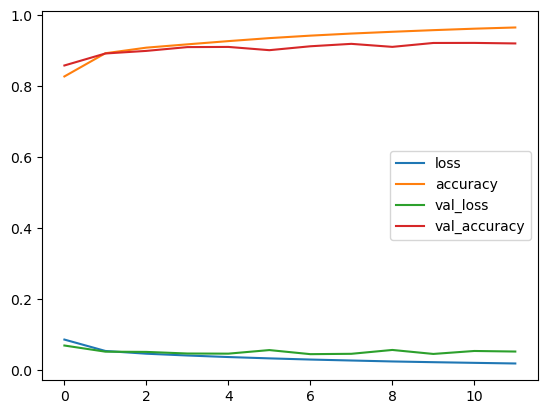

In [71]:
loss_df_model_layer = pd.DataFrame(model_layer_history.history)
loss_df_model_layer.plot();

Final model

In [72]:
model_final = Sequential(
    [
        Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu", padding="same"), 

        MaxPool2D(pool_size=(2, 2), strides = (1, 1)),

        Flatten(),
        Dropout(0.5),

        Dense(128,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),

        Dense(64,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        
        Dense(10,activation='softmax')
        
    ]
)
model_final.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)

In [73]:
model_final.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 20412)             0         
                                                                 
 dropout_1 (Dropout)         (None, 20412)             0         
                                                                 
 dense_11 (Dense)            (None, 128)               2612864   
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                      

##  Model final Training 

In [74]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5,
                                           restore_best_weights=True)

In [75]:
model_final_history = model_final.fit(X_train_vs, y_train_vc, batch_size=32, epochs=30, callbacks=[early_stop], validation_data = (X_val_s, y_val_vc))

Epoch 1/30


1688/1688 [==============================] - 318s 188ms/step - loss: 0.1571 - accuracy: 0.7986 - val_loss: 0.1311 - val_accuracy: 0.7968
Epoch 2/30
1688/1688 [==============================] - 54s 32ms/step - loss: 0.1098 - accuracy: 0.8472 - val_loss: 0.1043 - val_accuracy: 0.8567
Epoch 3/30
1688/1688 [==============================] - 23s 14ms/step - loss: 0.1009 - accuracy: 0.8546 - val_loss: 0.0997 - val_accuracy: 0.8583
Epoch 4/30
1688/1688 [==============================] - 23s 14ms/step - loss: 0.0957 - accuracy: 0.8619 - val_loss: 0.0925 - val_accuracy: 0.8632
Epoch 5/30
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0923 - accuracy: 0.8651 - val_loss: 0.0895 - val_accuracy: 0.8733
Epoch 6/30
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0908 - accuracy: 0.8674 - val_loss: 0.0890 - val_accuracy: 0.8717
Epoch 7/30
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0894 - accuracy: 0.8682 - val_loss: 0.0851 - val_accu

In [76]:
summary_model_final = pd.DataFrame(model_final.history.history)
summary_model_final= summary_model_final.mean().values

summary_model_final= pd.DataFrame(summary_model_final)
summary_model_final= summary_model_final.rename(index={0: 'loss', 1: 'accuracy', 2: 'val_loss', 3:'val_accuracy'})
summary_model_final

,0
loss,0.088226
accuracy,0.871250
val_loss,0.085984
val_accuracy,0.875206


In [77]:
loss, accuracy = model_final.evaluate(X_test_s, y_test_c, verbose=0)
loss_final= print("loss: ", loss)
accuracy_final = print('accuracy',accuracy) 


loss:  0.0803447738289833
accuracy 0.8783000111579895


**TASK 7: Plot values of metrics you used in your model.**

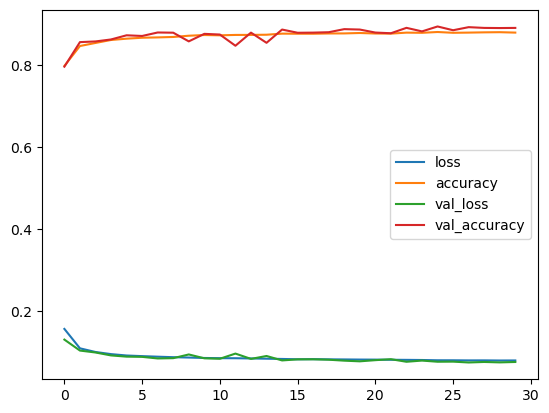

In [78]:
loss_df_model_final = pd.DataFrame(model_final_history.history)
loss_df_model_final.plot();

In [79]:
summary_model.iloc[2]


0    0.281902
Name: val_loss, dtype: float64

## compare models 

/opt/homebrew/Caskroom/miniconda/base/envs/project-ml-2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/project-ml-2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

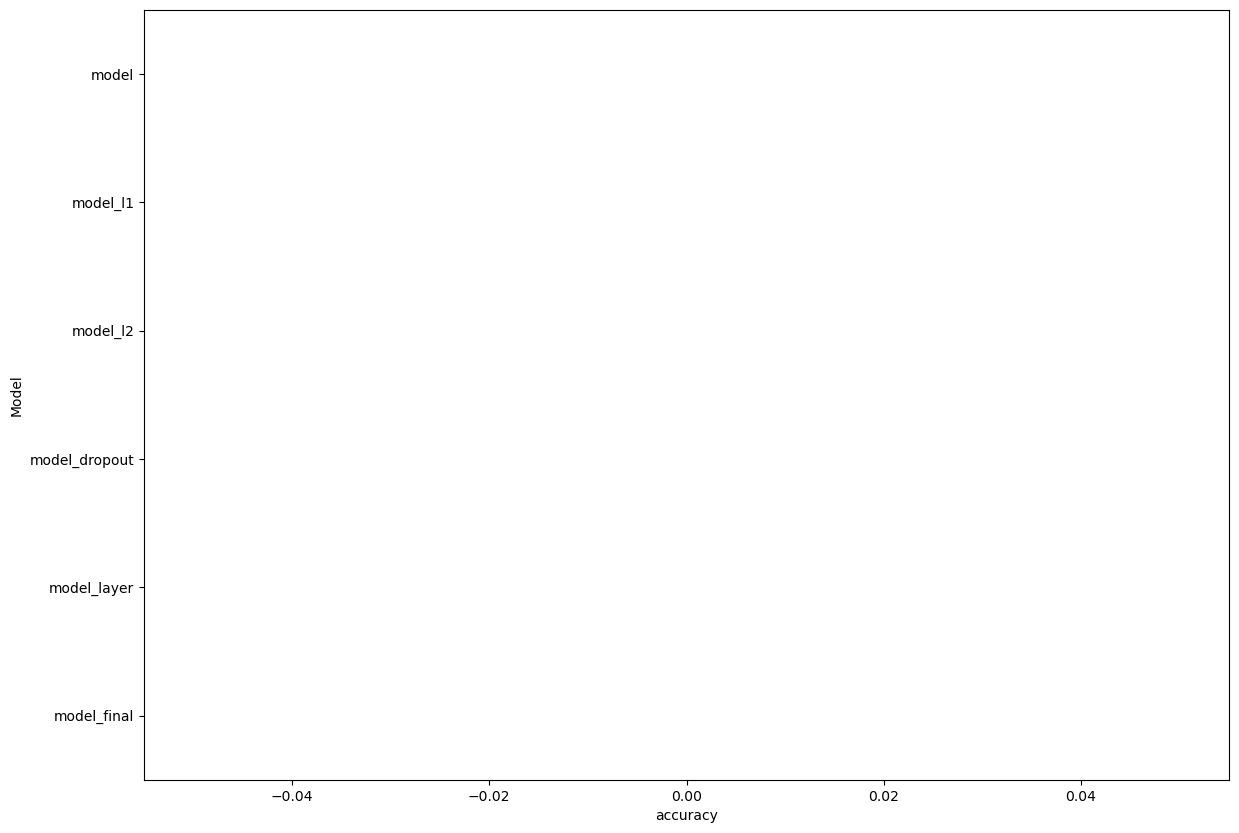

In [80]:

# compare models 

compare = pd.DataFrame(
    {
        "Model": ['model', 'model_l1', 'model_l2', 'model_dropout', 'model_layer', 'model_final'],
    
        'accuracy': [ accuracy_model, accuracy_l1, accuracy_l2, accuracy_dropout, accuracy_layer,accuracy_final]
    }    
)


plt.figure(figsize=(14, 10))
plt.plot()
compare = compare.sort_values(by="accuracy", ascending=False)
ax = sns.barplot(x="accuracy", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

all models preformence was good 
without overfitting!

highest accuracy first model with accuracy 0.911 and droupout model with 0.917 accuracy 

so we will use dropout model



313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1000
           1       0.99      0.98      0.99      1000
           2       0.84      0.87      0.86      1000
           3       0.92      0.93      0.92      1000
           4       0.85      0.87      0.86      1000
           5       0.99      0.98      0.98      1000
           6       0.79      0.73      0.76      1000
           7       0.95      0.98      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

-------------------------------------------------------------


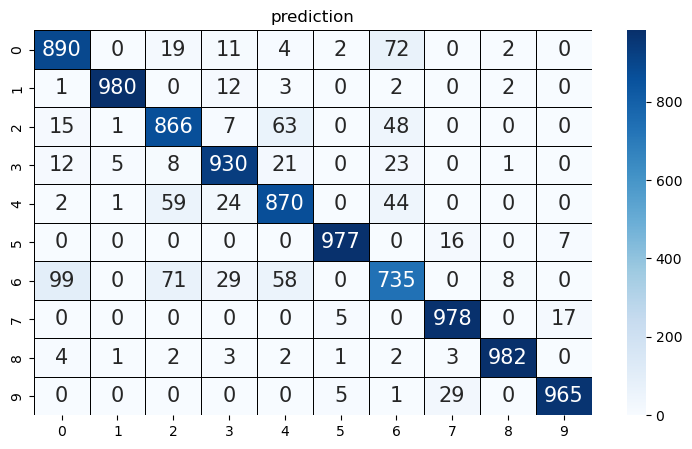

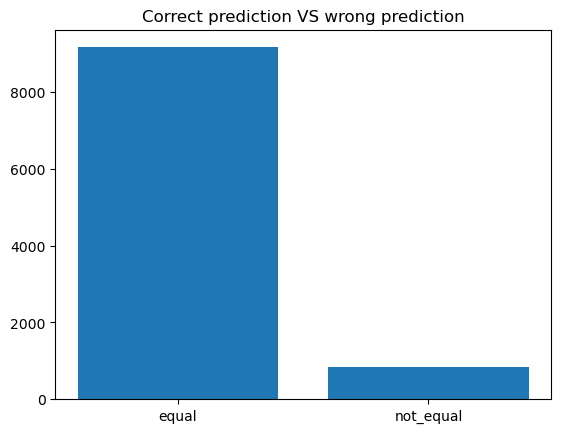

In [81]:
pred_prob = model_dropout.predict(X_test_s)
y_pred = np.argmax(pred_prob, axis=1)
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------------")
plt.figure(figsize=(9, 5))
sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,
        cmap="Blues",
        linewidths=0.5,
        linecolor="black",
        fmt="g",
        annot_kws={"size": 15},)
plt.title("prediction")
plt.show();
print("\n")
equal = np.equal(y_test, y_pred).sum()
not_equal= np.not_equal(y_test, y_pred).sum()
plt.bar(['equal','not_equal'] , [equal,not_equal] )
plt.title("Correct prediction VS wrong prediction")
plt.show();

In [115]:
#about 8.27% of the test set was miss classified
not_equal

827

## Prediction

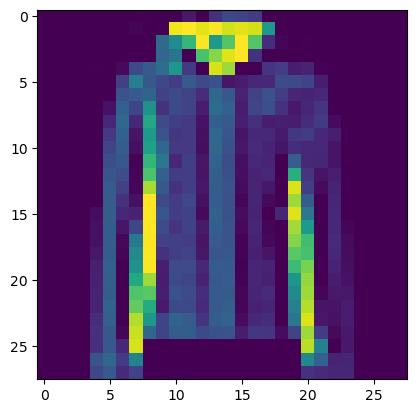

In [108]:
plt.imshow(X_test_s[6])
plt.show()

In [109]:
classes[y_test[6]]

'Coat'

In [111]:
predicted_value = model_dropout.predict(np.expand_dims(X_test_s[6], 0))
predicted_value

1/1 [==============================] - 0s 21ms/step


array([[5.3380802e-09, 9.1711821e-10, 1.2802704e-04, 6.8575414e-12,
        9.9987137e-01, 6.0906640e-13, 6.2005017e-07, 3.8013758e-14,
        3.4027884e-15, 1.7790774e-11]], dtype=float32)

Predicted value:  Coat 
Real value : Coat


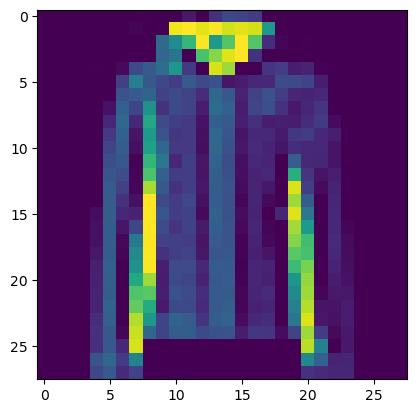

In [112]:

print('Predicted value: ', classes[np.argmax(predicted_value)],
      '\nReal value :', classes[y_test[6]])
plt.imshow(X_test_s[6]);

predection was correct even on the class that had the lowest accuracy!

References:
- https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___